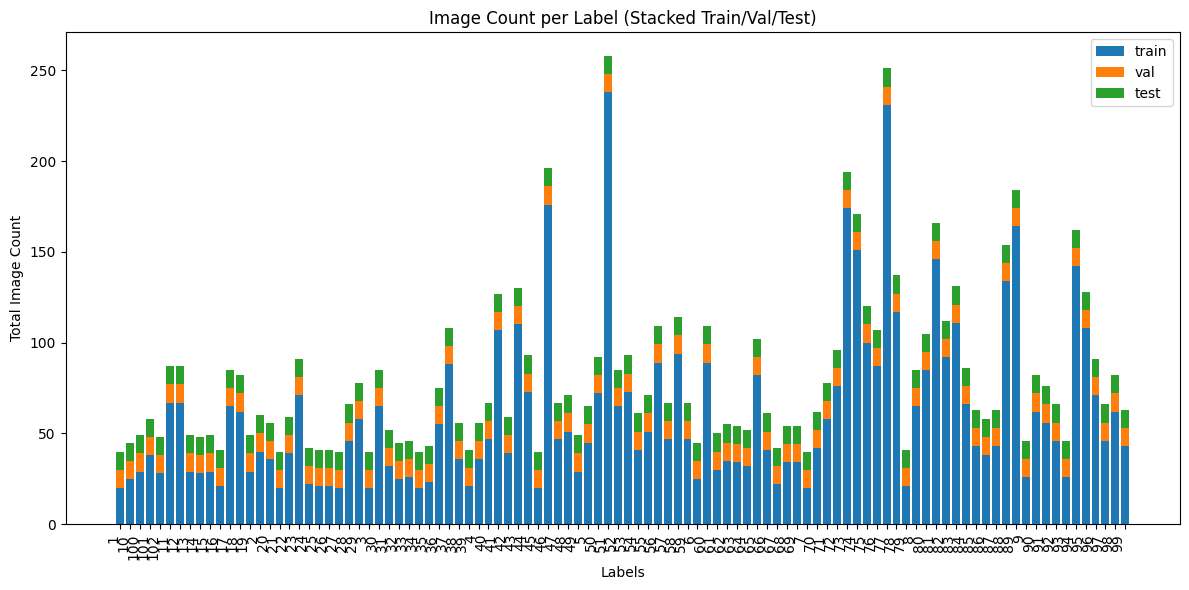

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# --- Config ---
dataset_root = Path("../dataset/oxford-flowers102")  # Update if needed
splits = ["train", "val", "test"]
colors = ["tab:blue", "tab:orange", "tab:green"]
image_exts = {".jpg", ".jpeg", ".png"}

# --- Count images per label per split ---
label_set = set()
split_counts = {split: {} for split in splits}

for split in splits:
    split_dir = dataset_root / split
    if split_dir.exists():
        for label_dir in split_dir.iterdir():
            if label_dir.is_dir():
                label = label_dir.name
                count = sum(1 for f in label_dir.glob("*") if f.suffix.lower() in image_exts)
                split_counts[split][label] = count
                label_set.add(label)

# --- Prepare data ---
labels = sorted(label_set)
counts_stacked = [ [split_counts[split].get(label, 0) for label in labels] for split in splits ]

# --- Plot stacked bar chart ---
x = np.arange(len(labels))
plt.figure(figsize=(12, 6))

bottom = np.zeros(len(labels))
for split, color, counts in zip(splits, colors, counts_stacked):
    plt.bar(x, counts, bottom=bottom, label=split, color=color)
    bottom += np.array(counts)

plt.xticks(x, labels, rotation=90, ha='right')
plt.ylabel("Total Image Count")
plt.xlabel("Labels")
plt.title("Image Count per Label (Stacked Train/Val/Test)")
plt.legend()
plt.tight_layout()
plt.show()